## Steps for EDA:
- Import Necessary Libraries
- Load the data and Data dictionary (if available)
- Data Understanding
- Missing Value Check
- Segmentation of Columns (Optional)
- Analysis:
    - Univariate Analysis (One Variable at a time)
    - Bivariate Analysis (Two Variable at a time)
    - Multivariate Analysis (More than two Variables at a time)

## Importing Necessary Library

In [1]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
df=pd.read_csv("titanic_dataset.csv")
#https://drive.google.com/file/d/1plN-KWVopblsqOdgTYPn-O-zG5cWrkf7/view?usp=drive_link

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
# Problem Statement: Variables/Factors affected the survival of passengers

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Value Check

In [8]:
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
## Cabin column has more than 40% of missing values so straight away dropping it
df=df.drop("Cabin",axis=1)

In [10]:
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [11]:
## Numerical column --> Mean/Median (Median is always better approach bcoz median is least affected with outliers)
## Categorical column --> Mode/create a new category (Missing)

In [13]:
med=df["Age"].median()
df["Age"]=df["Age"].fillna(med)

In [14]:
100*df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [19]:
mod=df["Embarked"].mode()[0]
df["Embarked"]=df["Embarked"].fillna(mod)

In [20]:
100*df.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [22]:
num_cols=["Age","Fare"]
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
extra_cols=["PassengerId","Name","Ticket"]

In [23]:
df=df.drop(extra_cols,axis=1)

In [24]:
df.shape

(891, 8)

In [25]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## Univariate Analysis

### Numerical

Histplot of Age


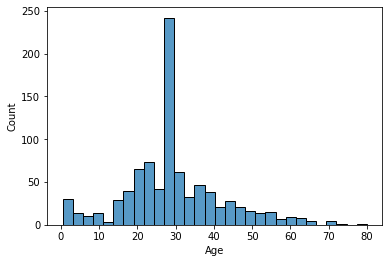

Histplot of Fare


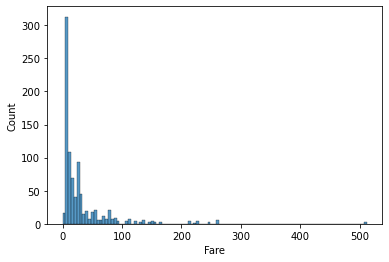

In [31]:
for i in num_cols:
    print("Histplot of",i)
    sns.histplot(x=df[i])
    plt.show()

Boxplot of Age


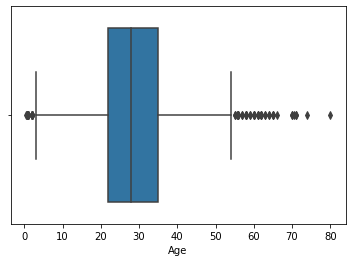

Boxplot of Fare


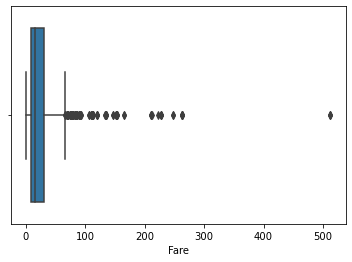

In [32]:
for i in num_cols:
    print("Boxplot of",i)
    sns.boxplot(x=df[i])
    plt.show()

### Categorical

Countplot of Survived


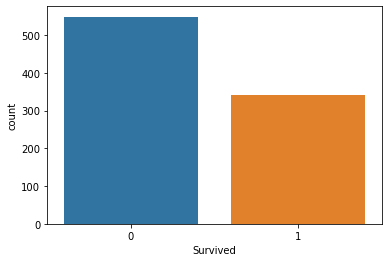

Countplot of Pclass


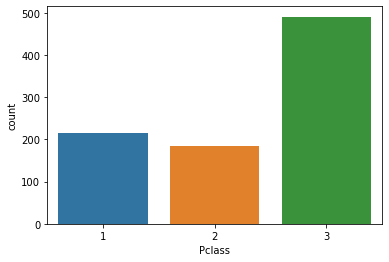

Countplot of Sex


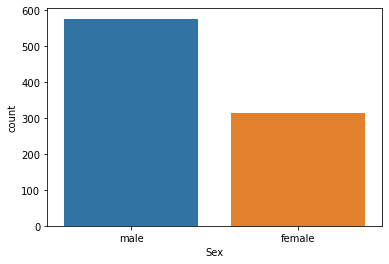

Countplot of SibSp


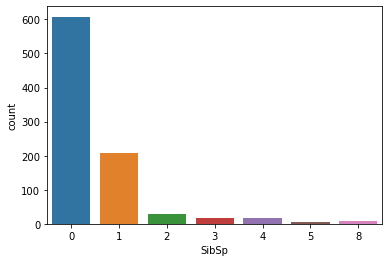

Countplot of Parch


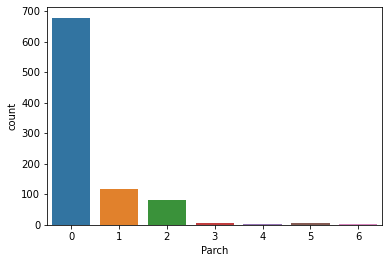

Countplot of Embarked


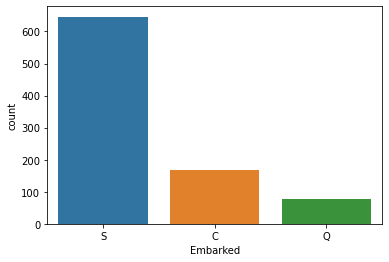

In [33]:
for i in cat_cols:
    print("Countplot of",i)
    sns.countplot(x=df[i])
    plt.show()

## Bivariate Analysis

### Numerical Vs Numerical

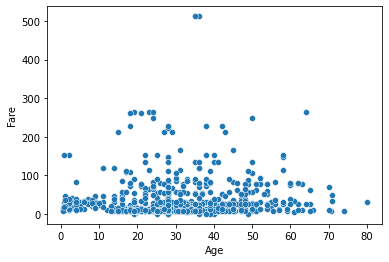

In [34]:
sns.scatterplot(x=df["Age"],y=df["Fare"])
plt.show()

### Numerical Vs Categorical

Survived Vs Age


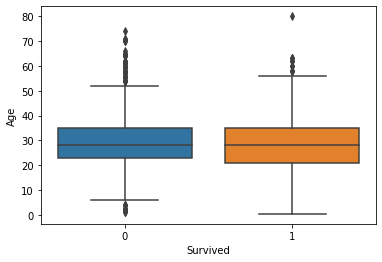

Survived Vs Fare


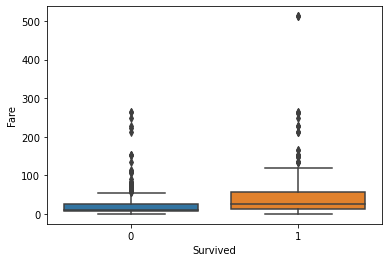

Pclass Vs Age


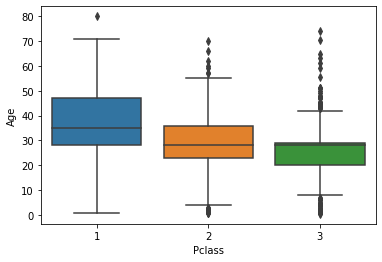

Pclass Vs Fare


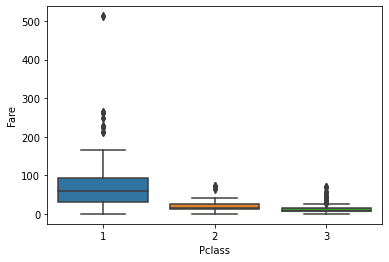

Sex Vs Age


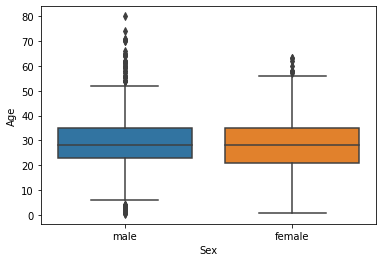

Sex Vs Fare


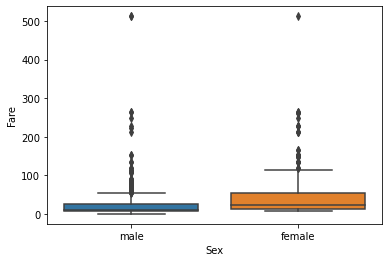

SibSp Vs Age


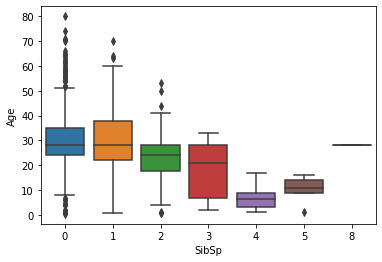

SibSp Vs Fare


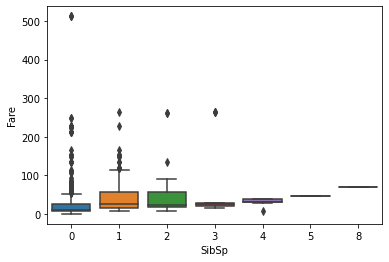

Parch Vs Age


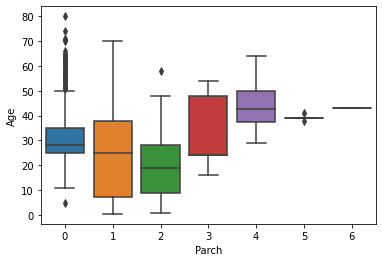

Parch Vs Fare


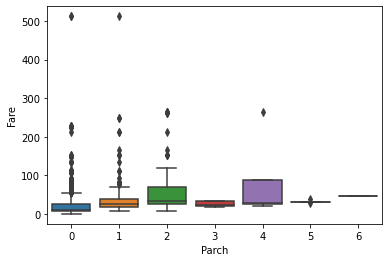

Embarked Vs Age


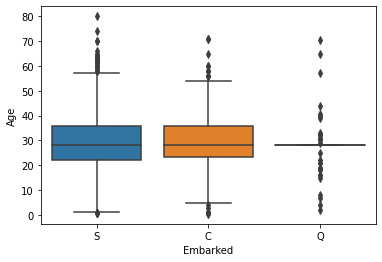

Embarked Vs Fare


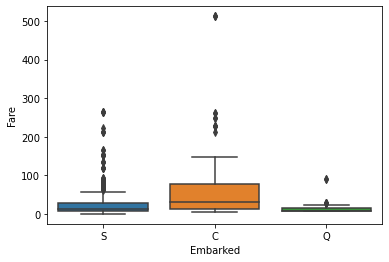

In [35]:
for col1 in cat_cols:
    for col2 in num_cols:
        print(col1,"Vs",col2)
        sns.boxplot(x=df[col1],y=df[col2])
        plt.show()

In [ ]:
# Write 3 insights from Univariate Analysis
# Write 3 insights from Bivariate Analysis

## Multivariate Analysis

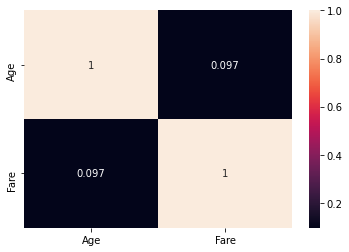

In [36]:
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

In [ ]:
## Correlation represents strength of relationship between variables
## Correlation lies in the range of -1 to 1
## Negative correlation  (0 to -1) shows inverse relationship
## Positive correlation (0 to 1) shows direct relationship
## 0 correlation represents no relationship.